# Questions from stake holder

### Import Libraries

In [30]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import calendar
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

### Read in and list the files in the directory

In [3]:
all_months_data = pd.DataFrame()

directory = '/Users/sba/Downloads/sales_data'

files = [file for file in os.listdir(directory)]

files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

### Merge all 12 Months Data into a single file

In [4]:
for file in files:
    file_path = os.path.join(directory, file)
    os_path = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, os_path])
    
all_months_data.to_csv('all_data', index=False)

### Read in the Data

In [5]:
all_data = pd.read_csv('all_data')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Finding null values and dropping them

In [6]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Removing the text "or" from the Order Date Column

In [10]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

all_data.dropna(inplace=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Converting the 'Quantity Ordered' and 'Price Each' to Numeric Value

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


### Converting the 'Order Date' to Datetime Value and extracting the month into a new column 'Month

In [13]:
all_data['Order Date'] = all_data['Order Date'].astype('datetime64[ns]')
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


### Using a function to get the 'City', 'State', and Zipcode from the 'Purchase Address' into a new column each

In [14]:
def get_city(address):
    return address.split(",")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

def get_zip(address):
    return address.split(",")[2].split(" ")[2]

all_data['Zip code'] = all_data['Purchase Address'].apply(lambda x: get_zip(x))

all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_name[int(x)])


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Zip code
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,New York City,NY,10001
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,New York City,NY,10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,New York City,NY,10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,San Francisco,CA,94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,Atlanta,GA,30301


# Question 1: What was the best month for sales? How much was earned that month?


### Adding a new column 'Sales' and getting the sum of numeric values groupby the Month column

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
April,20558,3367671.02,3390670.24
August,13448,2230345.42,2244467.88
December,28114,4588415.41,4613443.34
February,13449,2188884.72,2202022.42
January,10903,1811768.38,1822256.73
July,16072,2632539.56,2647775.76
June,15253,2562025.61,2577802.26
March,17005,2791207.83,2807100.38
May,18667,3135125.13,3152606.75


### Plot a bar chart showing the total sales for each month.

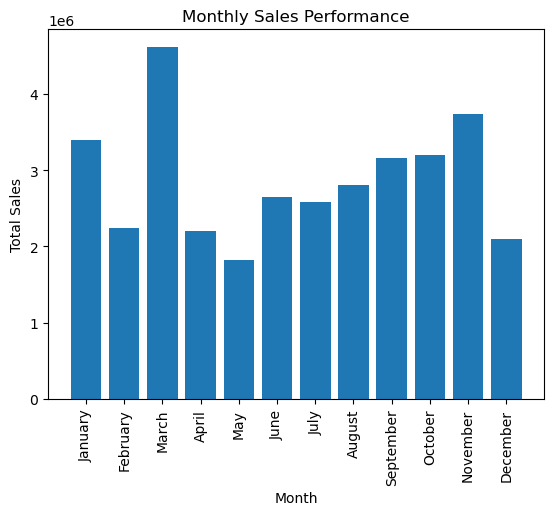

In [34]:
result = all_data.groupby(['Month']).sum()

months = range(1, 13)

plt.bar(months, result['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Performance')


plt.xticks(months, calendar.month_name[1:13], rotation='vertical')


plt.show()

# Question 2: What city sold the most product?

### Group the data in the all_data DataFrame by the 'City' column and calculates the sum of each numerical column.

In [17]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


### Plot a bar chart to visualize the total sales in USD for each city in the all_data DataFrame

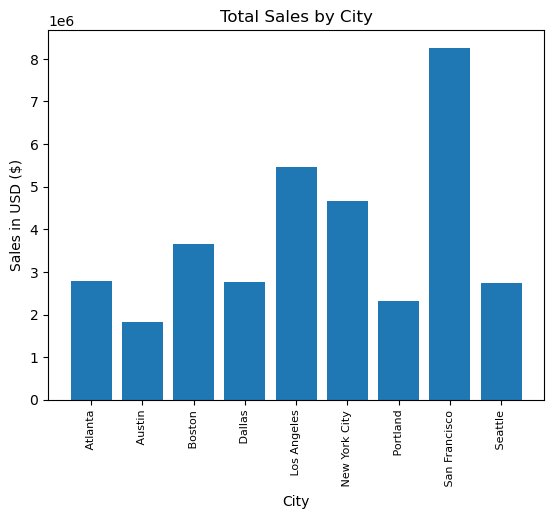

In [18]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Total Sales by City')
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

### Add three new columns to the all_data DataFrame: 'Hour', 'Minute', and 'Count'.

In [22]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Zip code,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,New York City,NY,10001,1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,New York City,NY,10001,600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,New York City,NY,10001,11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,San Francisco,CA,94016,149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,Atlanta,GA,30301,11.95,12,38,1


### Plot a line graph to visualize the count of orders for each hour in the all_data DataFrame

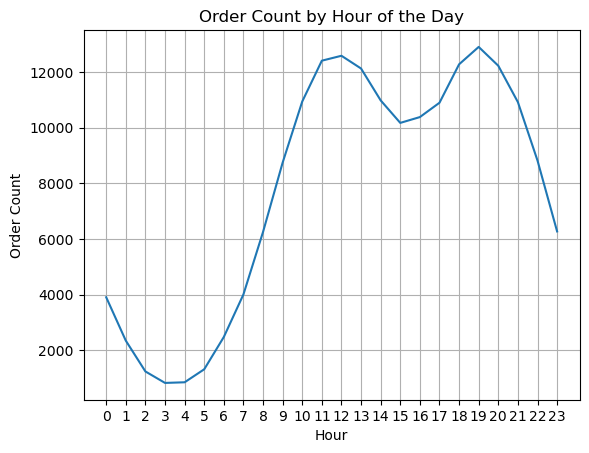

In [23]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.title('Order Count by Hour of the Day')
plt.grid()
plt.show()

# Question 4: What products are most often sold together?

In [26]:
duplicate_data = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicate_data['Grouped'] = duplicate_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
non_duplicate_data = duplicate_data[['Order ID', 'Grouped']].drop_duplicates()
non_duplicate_data.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


### Calculate the most common combinations of two products that appear together in the non_duplicate_data DataFrame

In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in non_duplicate_data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?

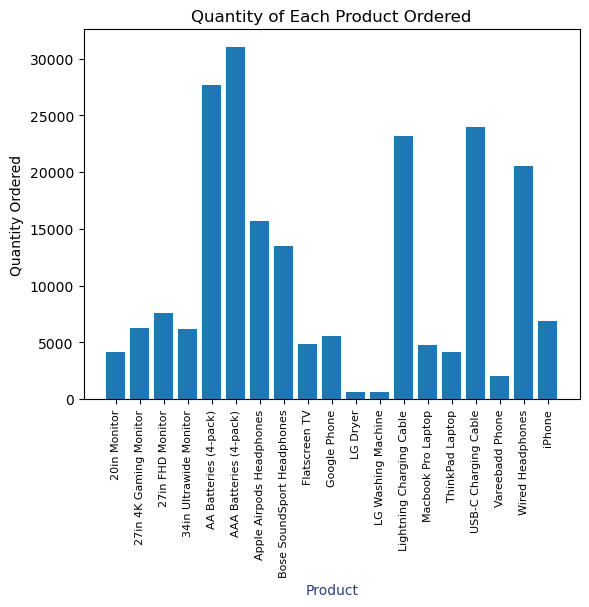

In [40]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product', color='#2F3C7E')
plt.ylabel('Quantity Ordered')
plt.title('Quantity of Each Product Ordered')
plt.show()

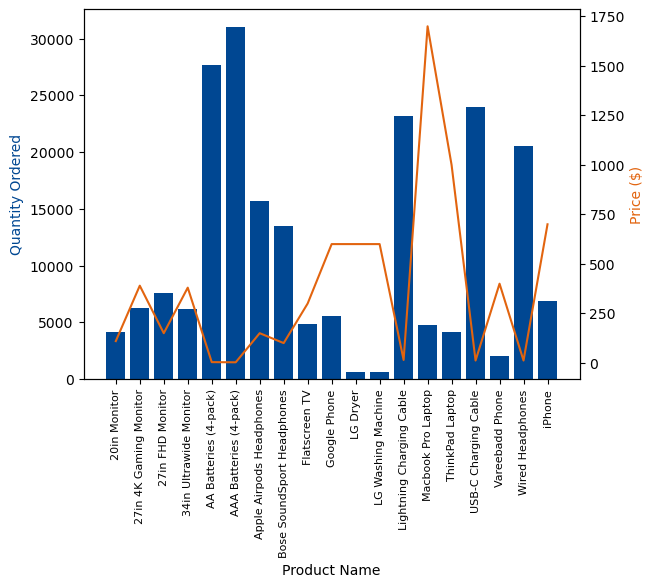

In [42]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='#004792')
ax2.plot(keys, prices, color='#E2640F')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='#004792')
ax2.set_ylabel('Price ($)', color='#E2640F')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()